# 1.0 Getting movie links for scraping

In [413]:
# Get Soup
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser

##Page list 
pagelist2015 = ['http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2015&p=.htm']
pagelist2014 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2014&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2013 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2013&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2012 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2012&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2011 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2011&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist = pagelist2015 + pagelist2014 + pagelist2013 + pagelist2012 + pagelist2011

In [414]:
##Find movie links based on page list
movielist = []
for page in pagelist:
    url = page
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    for x in soup.find_all('a'):
        try:
            if "/movies/?id" in x['href']:
                movielist.append(x['href'])
            else:
                continue
        except:
            continue
            
##Translate movie links into full html addresses
htmllist = []
for x in movielist:
    htmllist.append('http://www.boxofficemojo.com'+x+'&adjust_yr=2015&p=.htm')

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [416]:
len(htmllist)

3387

# 2.0 Scraping Script

## Import BeautifulSoup and scraping modules
from bs4 import BeautifulSoup
import requests
import re
url = 'http://www.boxofficemojo.com/movies/?id=fruitvale.htm'
response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
soup = BeautifulSoup(response.text)

## 2.1 Subfunctions to extract data from movie webpages

In [417]:
##Get movie title
def get_movie_title(soup):
    try:
        return soup.find('title').text.split('-')[0].split('(')[0].strip()
    except:
        return None

##Get movie domestic box office gross
def get_movie_domestic_gross(soup):
    try:
        return float(soup.find_all('b')[2].text.replace('$','').replace(',',''))/(10**6)
    except:
        return None
    
##Get movie distributor
def get_movie_distributor(soup):
    try:
        return soup.find(text=re.compile('Distributor')).findNextSibling().text
    except:
        return None
    
##Get movie release date
def get_movie_release_date(soup):
    try:
        datestring = soup.find(text=re.compile('Release Date')).findNextSibling().text
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None
        
##Get movie genre
def get_movie_genre(soup):
    try:
        return soup.find(text=re.compile('Genre:')).findNextSibling().text.split()[0]
    except:
        return None
    
##Get movie runtime
def get_movie_runtime(soup):
    try:
        runtime_string= soup.find(text=re.compile('Runtime')).findNextSibling().text.split()
        return float(runtime_string[0])*60 + float(runtime_string[2])
    except:
        return None

##Get movie MPAA rating
def get_movie_mpaa_rating(soup):
    try:
        return soup.find(text=re.compile('MPAA')).findNextSibling().text
    except:
        return None

##Get movie production budget
def get_movie_prod_budget(soup):
    try:
        prod_budget_string = soup.find(text=re.compile('Production Budget')).findNextSibling().text.replace('$','').replace(',','')
        if 'million' in prod_budget_string:
            return float(prod_budget_string.split()[0])
        else:
            return None
    except:
        return None

##Get movie opening weekend gross
def get_movie_weekend_gross(soup):
    if soup.find(text=re.compile('Wide\xa0Opening')):
        try:
            return float(soup.find(text=re.compile('Wide\xa0Opening')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    elif soup.find(text=re.compile('Opening\xa0Weekend')):
        try:
            return float(soup.find(text=re.compile('Opening\xa0Weekend')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    else:
        return None

##Get movie in release days
def get_movie_release_days(soup):
    try:
        return abs(float(soup.find(text=re.compile("In Release")).findNext().text.strip().split()[0]))
    except:
        return None

## 2.2  Combine subfunctions into one function

In [418]:
def get_movie_data(soup):
    datalist = []
    datalist.append(get_movie_title(soup))
    datalist.append(get_movie_domestic_gross(soup))
    datalist.append(get_movie_distributor(soup))
    datalist.append(get_movie_release_date(soup))
    datalist.append(get_movie_genre(soup))
    datalist.append(get_movie_runtime(soup))
    datalist.append(get_movie_mpaa_rating(soup))
    datalist.append(get_movie_prod_budget(soup))
    datalist.append(get_movie_weekend_gross(soup))
    datalist.append(get_movie_release_days(soup))
    df.append(datalist)

## 2.3 Loop through links and combine into one data frame

In [419]:
##Set df as master list
df = []
for link in htmllist:
    response = requests.get(link,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    get_movie_data(soup)

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [424]:
import pandas as pd
DF = pd.DataFrame(df, columns = ['title','dom_gross_adj_2015','distributor','release_date','genre','runtime','rating','budget','weekend_gross','in_release_days'])
DF.drop_duplicates()
DF.shape

(3387, 10)

### Checkpoint 1: Pickle

In [425]:
##Pickle
import pickle
with open('my_data.pkl', 'wb') as picklefile:
    pickle.dump(DF, picklefile)

In [426]:
##Take out of jar
import pickle
import pandas as pd
import numpy as np
import math
import matplotlib
import datetime
%matplotlib inline
with open("my_data.pkl", 'rb') as picklefile: 
    DF = pickle.load(picklefile)

In [473]:
DF2 = DF[(DF.dom_gross_adj_2015>1) & (DF.budget>1)].reset_index(drop=True)

In [474]:
def get_month(x):
    return x.month

def get_weekday(x):
    return x.isoweekday()

def get_monthday(x):
    return x.day

def get_year(x):
    return x.year

DF2["release_month"] = DF2["release_date"].apply(get_month)
DF2["release_weekday"] = DF2["release_date"].apply(get_weekday)
DF2["release_monthday"] = DF2["release_date"].apply(get_monthday)
DF2["release_year"] = DF2["release_date"].apply(get_year)

In [475]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
week_count_list = []
for current_row in range(DF2.shape[0]):
    week_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF[3]-compare_DF[3]).days)
        except:
            time_delta = 0
        if time_delta <= 7 and (current_DF[4] == compare_DF[4]):
            week_count +=1
    week_count_list.append(week_count)
week_count_list = pd.Series(week_count_list)

In [476]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF[3]-compare_DF[3]).days)
        except:
            time_delta = 0
        if time_delta <= 30 and (current_DF[4] == compare_DF[4]):
            month_count +=1
    month_count_list.append(month_count)
month_count_list = pd.Series(month_count_list)

In [477]:
##Create high budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_week_count_list = []
for current_row in range(DF2.shape[0]):
    week_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF[3]-compare_DF[3]).days)
        except:
            time_delta = 0
        if time_delta <= 7 and compare_DF.budget >= 100:
            week_count +=1
    budget_week_count_list.append(week_count)
budget_week_count_list = pd.Series(budget_week_count_list)

In [478]:
##Create high budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF[3]-compare_DF[3]).days)
        except:
            time_delta = 0
        if time_delta <= 30 and compare_DF.budget >= 100:
            month_count +=1
    budget_month_count_list.append(month_count)
budget_month_count_list = pd.Series(budget_month_count_list)

In [4]:
DF2["week_genre_density_count"] = week_count_list
DF2["month_genre_density_count"] = month_count_list
DF2["week_budget_density_count"] = budget_week_count_list
DF2["month_budget_density_count"] = budget_month_count_list
DF2 = DF2[(DF2["release_year"] >= 2011) & (DF2["release_year"] < 2016)]

NameError: name 'week_count_list' is not defined

In [5]:
DF2 = DF2[DF2['genre'] != 'Foreign']
DF2.release_month = DF2.release_month.astype('category')
DF2.release_weekday = DF2.release_weekday.astype('category')
DF2.release_monthday = DF2.release_monthday.astype('category')
DF2.release_year = DF2.release_year.astype('category')
DF2.distributor = DF2.distributor.astype('category')
DF2.genre = DF2.genre.astype('category')
DF2.rating = DF2.rating.astype('category')

### Checkpoint 2: Pickle

In [6]:
##Pickle checkpoint
import pickle
with open('my_data2.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
with open("my_data2.pkl", 'rb') as picklefile: 
    DF2 = pickle.load(picklefile)

# 3.0 Exploratory Analysis

# 4.0 Regression model

In [3]:
import statsmodels.formula.api as smf

In [4]:
DF3 = DF2.copy()

In [10]:
lm1 = smf.ols('dom_gross_adj_2015 ~ budget + genre + distributor + in_release_days + week_genre_density_count + month_genre_density_count + week_budget_density_count + month_budget_density_count',data=DF3)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     13.03
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           3.69e-71
Time:                        19:07:11   Log-Likelihood:                -2920.1
No. Observations:                 539   AIC:                             5972.
Df Residuals:                     473   BIC:                             6255.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                -81.8633     31.168     -2.627      0.009      -143.108   -20.619
genre[T.Adventure]                       -71.4647     24.479     -2.919      0.004      -119.566   -23.363
genre[T.Animation]                       -45.0445     12.876     -3.498      0.001       -70.345   -19.743
genre[T.Comedy]                            3.3507      9.634      0.348      0.728       -15.580    22.281
genre[T.Concert]                          20.7935     43.556      0.477      0.633       -64.793   106.380
genre[T.Crime]                           -15.8999     20.003     -0.795      0.427       -55.206    23.406
genre[T.Documentary]                       4.3164     36.125      0.119      0.905       -66.668    75.301
genre[T.Drama]                           -13.5535     11.238     -1.206      0.228       -35.637     8.530
genre[T.Family]                          -58.9083     19.616     -3.003      0.003       -97.453   -20.364
genre[T.Fantasy]                         -66.9216     19.221     -3.482      0.001      -104.690   -29.153
genre[T.Foreign]                       -1.722e-11   8.71e-12     -1.976      0.049     -3.43e-11  -9.4e-14
genre[T.Historical]                       -5.9763     38.169     -0.157      0.876       -80.979    69.026
genre[T.Horror]                            1.1818     13.524      0.087      0.930       -25.393    27.757
genre[T.Music]                             1.3456     43.691      0.031      0.975       -84.507    87.198
genre[T.Musical]                          -3.6882     23.223     -0.159      0.874       -49.322    41.946
genre[T.Period]                          -45.5913     31.476     -1.448      0.148      -107.442    16.260
genre[T.Romance]                          38.4143     22.023      1.744      0.082        -4.861    81.689
genre[T.Romantic]                        -33.3098     21.251     -1.567      0.118       -75.067     8.448
genre[T.Sci-Fi]                          -24.3776     11.467     -2.126      0.034       -46.911    -1.844
genre[T.Sports]                          -31.5121     26.262     -1.200      0.231       -83.117    20.092
genre[T.Thriller]                         -4.6563     13.731     -0.339      0.735       -31.638    22.325
genre[T.War]                             -34.8252     31.049     -1.122      0.263       -95.837    26.187
genre[T.Western]                         -63.3129     36.590     -1.730      0.084      -135.213     8.587
distributor[T.Anchor Bay Films]           60.1036     65.257      0.921      0.358       -68.125   188.333
distributor[T.Bleecker Street]            37.8066     65.110      0.581      0.562       -90.135   165.748
distributor[T.Broad Green Pictures]       38.1144     65.213      0.584      0.559     

In [11]:
lm2 = smf.ols('weekend_gross ~ budget + genre + distributor + in_release_days + week_genre_density_count + month_genre_density_count + week_budget_density_count + month_budget_density_count',data=DF3)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weekend_gross   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     12.09
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           1.50e-62
Time:                        19:07:19   Log-Likelihood:                -2149.0
No. Observations:                 496   AIC:                             4424.
Df Residuals:                     433   BIC:                             4689.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                -28.3190     20.987     -1.349      0.178       -69.567    12.929
genre[T.Adventure]                       -35.1890      8.961     -3.927      0.000       -52.801   -17.577
genre[T.Animation]                       -26.4212      4.610     -5.732      0.000       -35.481   -17.361
genre[T.Comedy]                           -2.2249      3.359     -0.662      0.508        -8.826     4.377
genre[T.Concert]                           5.6656     14.858      0.381      0.703       -23.537    34.868
genre[T.Crime]                           -15.6097      7.116     -2.194      0.029       -29.596    -1.624
genre[T.Documentary]                      -4.2452     12.314     -0.345      0.730       -28.449    19.958
genre[T.Drama]                           -12.7843      4.164     -3.071      0.002       -20.968    -4.601
genre[T.Family]                          -30.9257      6.746     -4.584      0.000       -44.185   -17.666
genre[T.Fantasy]                         -29.0535      6.600     -4.402      0.000       -42.026   -16.081
genre[T.Foreign]                       -3.487e-12   2.25e-12     -1.550      0.122     -7.91e-12  9.36e-13
genre[T.Historical]                      -20.2618     16.874     -1.201      0.231       -53.428    12.904
genre[T.Horror]                           -1.7141      4.667     -0.367      0.714       -10.886     7.458
genre[T.Music]                            -3.6653     14.870     -0.246      0.805       -32.892    25.561
genre[T.Musical]                         -15.7030      8.003     -1.962      0.050       -31.433     0.027
genre[T.Period]                          -18.4203     10.770     -1.710      0.088       -39.588     2.747
genre[T.Romance]                          19.0619      7.571      2.518      0.012         4.182    33.942
genre[T.Romantic]                        -16.0956      7.542     -2.134      0.033       -30.920    -1.271
genre[T.Sci-Fi]                          -14.1941      3.987     -3.560      0.000       -22.030    -6.359
genre[T.Sports]                          -18.3871      8.972     -2.049      0.041       -36.021    -0.753
genre[T.Thriller]                         -6.9420      4.774     -1.454      0.147       -16.325     2.441
genre[T.War]                             -17.3287     12.033     -1.440      0.151       -40.980     6.322
genre[T.Western]                         -48.7179     14.823     -3.287      0.001       -77.851   -19.585
distributor[T.Anchor Bay Films]           23.7975     28.569      0.833      0.405       -32.354    79.949
distributor[T.Bleecker Street]         -5.531e-14   1.27e-13     -0.436      0.663     -3.05e-13  1.94e-13
distributor[T.Broad Green Pictures]    -1.376e-14   5.84e-14     -0.236      0.814     

(0, 150)

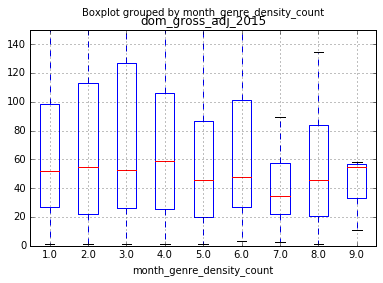

In [15]:
import matplotlib.pyplot as plt
DF3.boxplot(column='dom_gross_adj_2015',by='month_genre_density_count')
plt.ylim((0,150))